In [12]:
from modules.data_modules import MNISTDataModule
from modules.Diffusion_model import ImageDiffusionModule, _calculate_FID_SCORE
import pytorch_lightning as pl
import torch.nn as nn
import matplotlib.pyplot as plt


dm = MNISTDataModule(BATCH_SIZE=256, 
                     NORMALIZE_MEAN=0., 
                     NORMALIZE_STD=1., 
                     SHEAR=0.1, 
                     ROTATION=20, 
                     TRANSLATE_X=0.1, 
                     TRANSLATE_Y=0.1,
                     SCALE=0.2,
                        )
dm.setup() # max_samples=10000 doesn't work for some reason

plModule = ImageDiffusionModule(
    LEARNING_RATE = 0.002,
    TIMESTEPS=1000,
    criteria=nn.MSELoss(),
    TIME_EMBEDDING_DIM=24,
    NOISE_SCHEDULE_METHOD='cosine',
    EPSILON=0.008,
    BETA_START=1e-5,
    BETA_END=0.005,
    CLIPPED_REVERSE_DIFFUSION=True,
    SAMPLE_EVERY=1,
    BASE_DIM=32
)

# logger = pl.loggers.TensorBoardLogger("logs", name="diffusion")
# trainer = pl.Trainer(max_epochs=400,
#                      logger=logger,)
# trainer.fit(plModule, dm)


DataModule params:
	batch_size: 256
	path: /Users/tonton/Documents/motion-synthesis/mnist_latent_diffusion/
	rotation: 20
	scale: 0.2
	translate: (0.1, 0.1)
	shear: 0.1
	normalize: (0.0, 1.0)
	bool: False
	no_normalize: False
len before 60000 10000


In [13]:
ckpt = 'logs/diffusion/version_117/checkpoints/epoch=63-step=12032.ckpt'

# trainer = pl.Trainer(resume_from_checkpoint=ckpt, max_epochs=400, logger=None)
model = ImageDiffusionModule.load_from_checkpoint(ckpt)#.to(torch.device('mps'))

Sampling: 100%|██████████| 1000/1000 [01:09<00:00, 14.39it/s]


[]

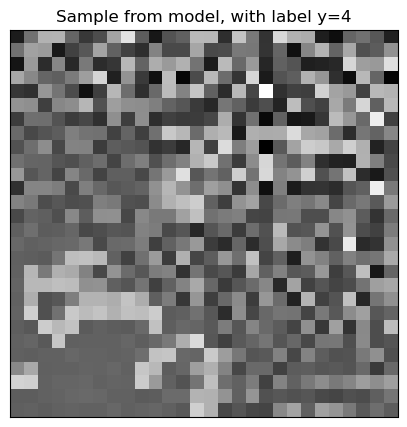

In [17]:
x_t, hist, y = model.model.sampling(1, clipped_reverse_diffusion=False, y=True, device='mps', tqdm_disable=False)

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
ax.imshow(x_t.squeeze().detach().cpu().numpy(), cmap='gray')
ax.set_title(f'Sample from model, with label y={y.item()}')
ax.set_xticks([])
ax.set_yticks([])

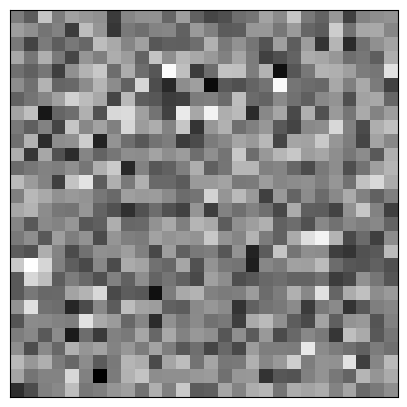

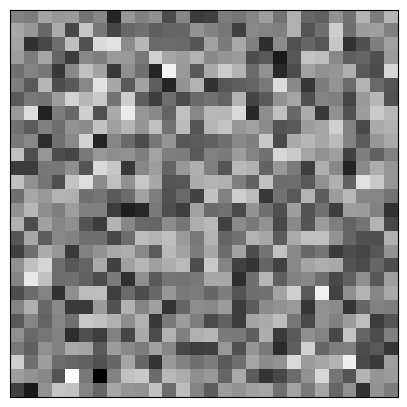

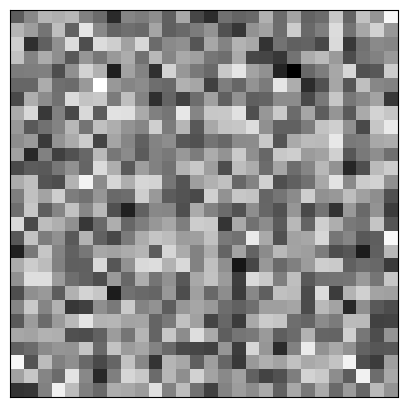

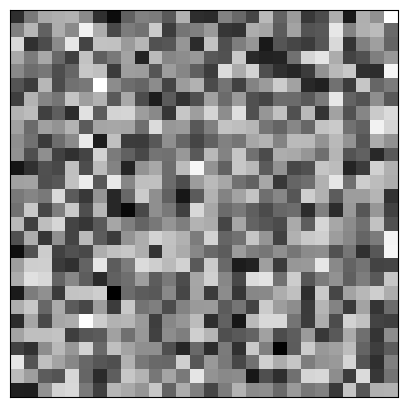

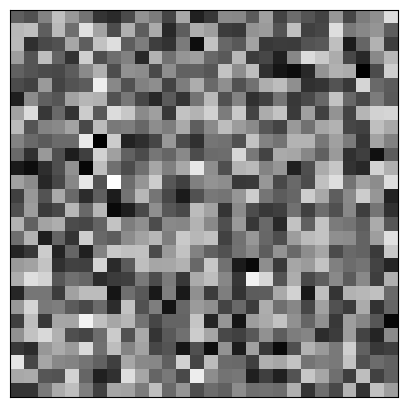

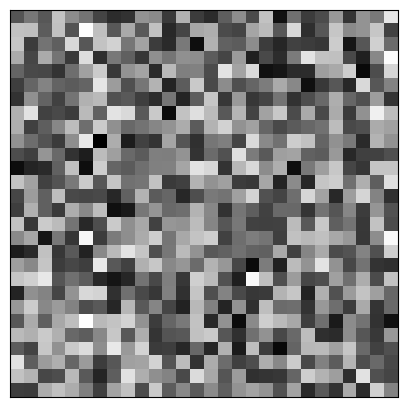

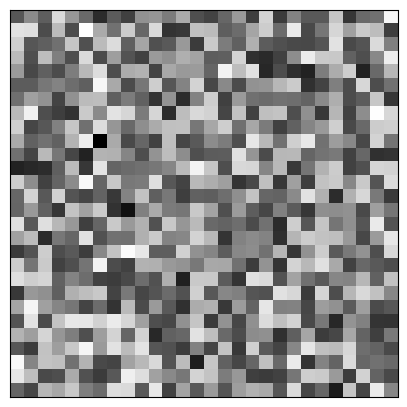

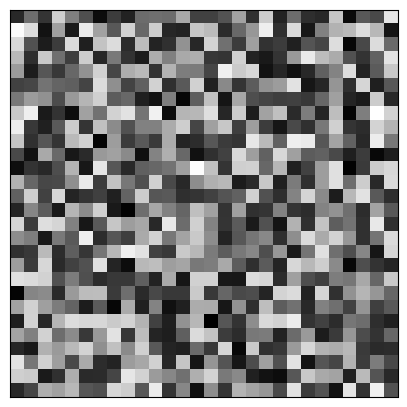

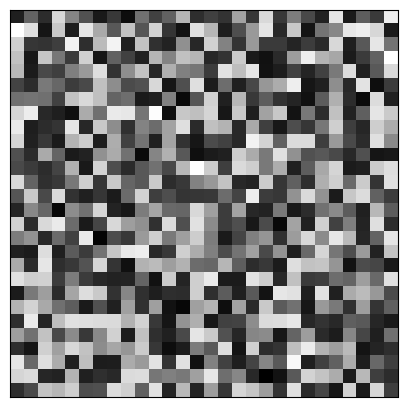

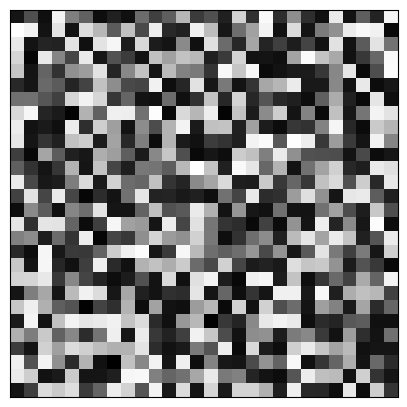

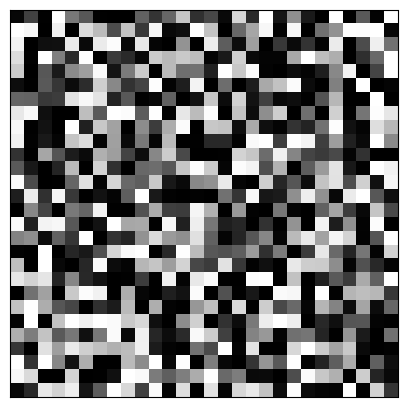

In [10]:
for im in hist[::100].squeeze().detach().cpu().numpy():
    fig, ax = plt.subplots(1, 1, figsize=(5, 6))
    ax.imshow(im, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# implement tghe following:

def get_index_from_list(vals, t, x_shape):
    batch_size = t.shape[0]
    out = vals.gather(-1, t)
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)